In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [3]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Scaling 'Amount' column using standard scaler**

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
df= df.drop('Time',axis=1)

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [13]:
df.duplicated().any()

True

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(275663, 30)

In [16]:
df['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

**Data Visulaization with Seaborn**

<Axes: xlabel='Class', ylabel='count'>

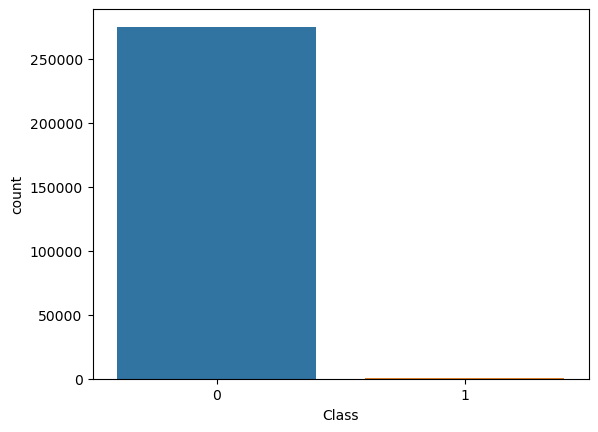

In [17]:
import seaborn as sns

sns.countplot(x=df['Class'])

**Highly Imbalanced Dataset**

In [18]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Handling Imbalanced Data**

In [20]:
#undersampling
#oversampling

**Undersampling**

In [21]:
normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [22]:
normal.shape

(275190, 30)

In [23]:
fraud.shape

(473, 30)

In [24]:
normal_sample = normal.sample(n=473)

In [25]:
normal_sample.shape

(473, 30)

In [26]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [27]:
new_data.shape

(946, 30)

In [28]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.722032,-3.724746,-0.126861,-0.427394,-2.304571,-0.294118,0.600770,-0.193312,1.784453,-1.677877,...,0.633714,-0.163835,-0.824421,0.501959,-0.119368,-0.123697,-0.125612,0.199361,3.644857,0
1,1.175993,0.418133,0.364368,1.229727,-0.183366,-0.962896,0.405745,-0.260464,-0.267614,-0.003032,...,-0.448887,-1.385836,0.194533,0.328592,0.259181,-0.841941,0.009118,0.035917,-0.215695,0
2,-2.285847,-2.326117,-1.414627,-1.521391,-2.737237,1.298678,2.681188,0.446952,0.753438,-3.409783,...,0.921863,0.757230,2.208354,-0.095767,-0.388054,-0.270059,-0.186297,0.219955,3.644857,0
3,-1.837259,1.031293,2.747868,3.188022,-1.409803,2.466071,-1.836345,1.946992,0.085124,0.301102,...,0.227283,1.061206,-0.158567,-0.232923,0.129711,0.607314,0.327890,0.027800,-0.343114,0
4,-0.640348,0.214874,0.257166,-1.139676,-1.744050,-0.336548,-1.239033,0.848159,-0.535767,-0.727768,...,0.562017,1.467227,0.062038,-0.142739,-0.974370,-0.149440,-0.087397,-0.048127,0.002400,0


In [29]:
X= new_data.drop('Class',axis=1)
y=new_data['Class']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred1 = log.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred1)

0.9473684210526315

In [34]:
from sklearn.metrics import precision_score,recall_score,f1_score

precision_score(y_test,y_pred1)

0.9893617021276596

In [35]:
recall_score(y_test,y_pred1)

0.9117647058823529

In [36]:
f1_score(y_test,y_pred1)

0.9489795918367346

**Decision Tree Classifier**

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred2 = dtc.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred2)

0.9157894736842105

In [40]:
from sklearn.metrics import precision_score,recall_score,f1_score

precision_score(y_test,y_pred2)

0.93

In [41]:
recall_score(y_test,y_pred2)

0.9117647058823529

In [42]:
f1_score(y_test,y_pred2)

0.9207920792079208

**Random Forest Classifier**

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_pred3 = rf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy_score(y_test,y_pred3)

0.9368421052631579

In [47]:
precision_score(y_test,y_pred3)

0.9787234042553191

In [49]:
recall_score(y_test,y_pred3)

0.9019607843137255

In [50]:
f1_score(y_test,y_pred3)

0.9387755102040817

In [63]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              'ACC':[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [64]:
final_data

,Models,ACC
0,LR,94.736842
1,DT,91.578947
2,RF,93.684211


<Axes: xlabel='Models', ylabel='ACC'>

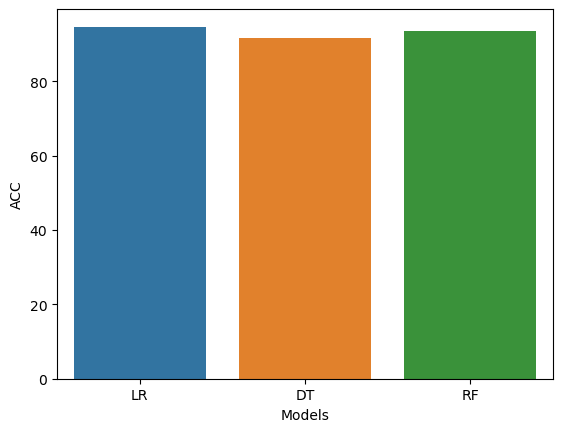

In [69]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

**Oversampling**

In [72]:
df.shape

(275663, 30)

In [73]:
X_new= df.drop('Class',axis=1)
y_new=df['Class']

In [74]:
X_new.shape

(275663, 29)

In [75]:
y_new.shape

(275663,)

**Using SNOTE for Oversampling**

In [81]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [82]:
import imblearn
print("Imbalanced-Learn", imblearn.__version__)

Imbalanced-Learn 0.10.1


In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
X_res,y_res = SMOTE().fit_resample(X_new,y_new)

In [88]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

**Logistic Regression**

In [90]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [91]:
y_pred1 = log.predict(X_test)

In [92]:
accuracy_score(y_test,y_pred1)

0.9437570405901378

In [93]:
precision_score(y_test,y_pred1)

0.972947833501279

In [94]:
recall_score(y_test,y_pred1)

0.9128229369307129

In [95]:
f1_score(y_test,y_pred1)

0.9419268903542919

**DecisionTreeClassifier**

In [96]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [97]:
y_pred2 = dtc.predict(X_test)

In [98]:
accuracy_score(y_test,y_pred2)

0.9984828663832261

In [99]:
precision_score(y_test,y_pred2)

0.9976946814303866

In [100]:
recall_score(y_test,y_pred2)

0.9992727669399851

In [101]:
f1_score(y_test,y_pred2)

0.9984831006512677

**RandomForestClassifier**

In [102]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [103]:
y_pred3 = rf.predict(X_test)

In [110]:
accuracy_score(y_test,y_pred3)

0.999918238308078

In [111]:
precision_score(y_test,y_pred3)

0.9998363993310551

In [112]:
recall_score(y_test,y_pred3)

1.0

In [113]:
f1_score(y_test,y_pred3)

0.9999181929736854

In [114]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              'ACC':[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [115]:
final_data

,Models,ACC
0,LR,94.375704
1,DT,99.848287
2,RF,99.991824


<Axes: xlabel='Models', ylabel='ACC'>

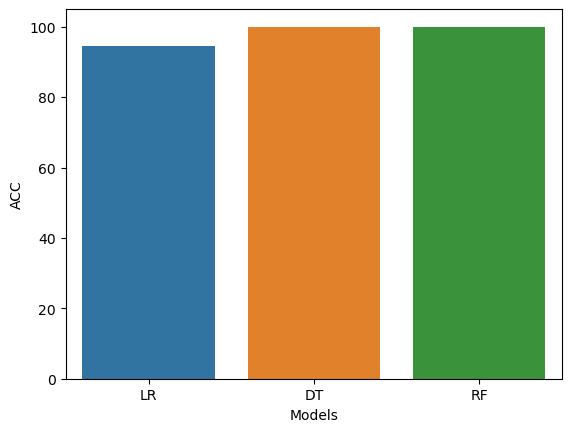

In [116]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

**Save the model**

In [117]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [118]:
import pickle
pickle.dump(rf1,open('credit_card_fraud.pkl','wb'))